In [1]:
import pandas as pd
import numpy as np

race_data = pd.read_csv('data.csv')
race_data.head()

,Driver,LapNumber,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,Compound,TyreLife,...,Team,Track,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,NextSectorTime
0,21.0,3.0,27.804,40.703,33.189,205.0,179.0,199.0,2.0,2.0,...,8.0,0.0,28.9,52.0,991.5,0.0,34.6,92.0,3.9,27.910
1,21.0,3.0,40.703,33.189,27.910,205.0,179.0,199.0,2.0,2.0,...,8.0,0.0,28.9,52.0,991.5,0.0,34.6,92.0,3.9,40.636
2,21.0,3.0,33.189,27.910,40.636,205.0,179.0,199.0,2.0,2.0,...,8.0,0.0,28.9,52.0,991.5,0.0,34.6,92.0,3.9,33.347
3,21.0,4.0,27.910,40.636,33.347,202.0,180.0,197.0,2.0,3.0,...,8.0,0.0,28.9,50.0,991.7,0.0,34.6,112.0,4.3,28.030
4,21.0,4.0,40.636,33.347,28.030,202.0,180.0,197.0,2.0,3.0,...,8.0,0.0,28.9,50.0,991.7,0.0,34.6,112.0,4.3,40.805


In [2]:
from sklearn.preprocessing import StandardScaler

race_data.sort_values(['Driver', 'LapNumber'], inplace=True)
no_norm = ['Driver', 'Compound', 'Team', 'Track', 'FreshTyre', 'NextSectorTime']
cols_to_norm = [col for col in race_data.columns if col not in no_norm]
ss = StandardScaler()
race_data[cols_to_norm] = ss.fit_transform(race_data[cols_to_norm].values)
race_data.head()

,Driver,LapNumber,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,Compound,TyreLife,...,Team,Track,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,NextSectorTime
36657,0.0,-1.654732,1.439088,2.114081,-0.551845,-1.569492,-1.164082,1.883872,2.0,-1.312528,...,9.0,1.0,0.224022,-0.108325,0.433758,-0.152006,1.017865,-0.015796,0.227263,38.989
36658,0.0,-1.654732,2.113469,-0.552071,1.340174,-1.569492,-1.164082,1.883872,2.0,-1.312528,...,9.0,1.0,0.224022,-0.108325,0.433758,-0.152006,1.017865,-0.015796,0.227263,44.312
36659,0.0,-1.654732,-0.552649,1.338884,2.086909,-1.569492,-1.164082,1.883872,2.0,-1.312528,...,9.0,1.0,0.224022,-0.108325,0.433758,-0.152006,1.017865,-0.015796,0.227263,25.514
36837,0.0,-1.654732,-0.655839,0.564247,-0.646677,-0.275597,-0.143910,0.242126,3.0,-1.312528,...,9.0,2.0,-0.302905,0.664975,0.283326,-0.152006,-0.222235,-0.727837,-1.023629,24.450
36838,0.0,-1.654732,0.563655,-0.646850,-0.699424,-0.275597,-0.143910,0.242126,3.0,-1.312528,...,9.0,2.0,-0.302905,0.664975,0.283326,-0.152006,-0.222235,-0.727837,-1.023629,33.092


In [3]:
encoding_dim = 25
# Calculate positional encoding values based on sinusoidal functions
positional_encoding = np.zeros((len(race_data), encoding_dim))
for i, lap in enumerate(race_data['NextSectorTime']):
    for j in range(encoding_dim):
        positional_encoding[i, j] = np.sin(lap * (j + 1))

# Add positional encoding vectors as separate columns to the data frame
for i in range(encoding_dim):
    race_data[f'PosEncoding_{i+1}'] = positional_encoding[:, i]
    
# Move NextSectorTime to the end of the data frame
race_data = race_data[[c for c in race_data if c not in ['NextSectorTime']] + ['NextSectorTime']]

# Display the modified data frame with positional encoding
race_data.head()

,Driver,LapNumber,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,Compound,TyreLife,...,PosEncoding_17,PosEncoding_18,PosEncoding_19,PosEncoding_20,PosEncoding_21,PosEncoding_22,PosEncoding_23,PosEncoding_24,PosEncoding_25,NextSectorTime
36657,0.0,-1.654732,1.439088,2.114081,-0.551845,-1.569492,-1.164082,1.883872,2.0,-1.312528,...,0.063008,-0.941427,-0.584989,0.617076,0.927131,-0.103022,-0.984252,-0.442703,0.738793,38.989
36658,0.0,-1.654732,2.113469,-0.552071,1.340174,-1.569492,-1.164082,1.883872,2.0,-1.312528,...,-0.627421,-0.341520,-0.018830,0.305889,0.597656,0.825042,0.963553,0.998267,0.925444,44.312
36659,0.0,-1.654732,-0.552649,1.338884,2.086909,-1.569492,-1.164082,1.883872,2.0,-1.312528,...,0.196918,0.547583,0.819611,0.973938,0.988402,0.860925,0.609814,0.271131,-0.106489,25.514
36837,0.0,-1.654732,-0.655839,0.564247,-0.646677,-0.275597,-0.143910,0.242126,3.0,-1.312528,...,0.819059,0.273499,-0.394674,-0.885911,-0.979987,-0.634728,-0.004915,0.627101,0.977983,24.450
36838,0.0,-1.654732,0.563655,-0.646850,-0.699424,-0.275597,-0.143910,0.242126,3.0,-1.312528,...,-0.217171,-0.947908,0.416388,0.860398,-0.597214,-0.734884,0.751662,0.576911,-0.872908,33.092


In [4]:
race_data.drop(columns=['LapNumber'], inplace=True)
race_data.head()

,Driver,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,Compound,TyreLife,FreshTyre,...,PosEncoding_17,PosEncoding_18,PosEncoding_19,PosEncoding_20,PosEncoding_21,PosEncoding_22,PosEncoding_23,PosEncoding_24,PosEncoding_25,NextSectorTime
36657,0.0,1.439088,2.114081,-0.551845,-1.569492,-1.164082,1.883872,2.0,-1.312528,1.0,...,0.063008,-0.941427,-0.584989,0.617076,0.927131,-0.103022,-0.984252,-0.442703,0.738793,38.989
36658,0.0,2.113469,-0.552071,1.340174,-1.569492,-1.164082,1.883872,2.0,-1.312528,1.0,...,-0.627421,-0.341520,-0.018830,0.305889,0.597656,0.825042,0.963553,0.998267,0.925444,44.312
36659,0.0,-0.552649,1.338884,2.086909,-1.569492,-1.164082,1.883872,2.0,-1.312528,1.0,...,0.196918,0.547583,0.819611,0.973938,0.988402,0.860925,0.609814,0.271131,-0.106489,25.514
36837,0.0,-0.655839,0.564247,-0.646677,-0.275597,-0.143910,0.242126,3.0,-1.312528,1.0,...,0.819059,0.273499,-0.394674,-0.885911,-0.979987,-0.634728,-0.004915,0.627101,0.977983,24.450
36838,0.0,0.563655,-0.646850,-0.699424,-0.275597,-0.143910,0.242126,3.0,-1.312528,1.0,...,-0.217171,-0.947908,0.416388,0.860398,-0.597214,-0.734884,0.751662,0.576911,-0.872908,33.092


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Embedding, concatenate

categorical_features = ['Driver', 'Compound', 'Team', 'Track', 'FreshTyre']
weather_features = ['AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']
numerical_features = [col for col in race_data.columns if (col not in categorical_features and col not in weather_features)]
numerical_features.remove('NextSectorTime')

def create_model(X_cat, X_num, weather, df):
    input_weather = Input(shape=(weather.shape[1],), 
                          dtype='float64', 
                          name='wide_inputs')
    
    weather_branch = Dense(units=512, activation='relu', name='weather_1')(input_weather)
    # weather_branch = Dense(units=64,activation='relu', name='weather_2')(weather_branch)
    
    input_cat = Input(shape=(X_cat.shape[1],),
                      dtype='int64',
                      name='categorical_input')
    
    cat_outputs = []
    for idx, col in enumerate(categorical_features):
        N = int(df[col].max() + 1)

        x = tf.gather(input_cat, idx, axis=1)
        
        x = Embedding(input_dim=N,
                      output_dim=int(np.sqrt(N)),
                      input_length=1,
                      name=col+'_embed')(x)
        
        cat_outputs.append(x)
        
    wide_branch = concatenate(cat_outputs, name='wide_cat')
    wide_branch = concatenate([wide_branch, weather_branch], name='wide_concat')
        
    input_num = Input(shape=(X_num.shape[1],),
                      name='numeric_input')
    deep_branch = Dense(units=1024, activation='relu', name='num_1')(input_num)
    deep_branch = Dense(units=512,activation='relu', name='deep1')(deep_branch)
    # deep_branch = Dropout(0.2)(deep_branch)
    # deep_branch = Dense(units=32,activation='relu', name='deep2')(deep_branch)
    # deep_branch = Dense(units=16,activation='relu', name='deep3')(deep_branch)
    # deep_branch = Dense(units=8,activation='relu', name='deep4')(deep_branch)
    # deep_branch = Dense(units=5,activation='relu', name='deep5')(deep_branch)
    
    deep_branch = concatenate([wide_branch, deep_branch],
                               name='concat_deep_wide')
    
    deep_branch = Dense(units=256, activation='relu', name='deep5')(deep_branch)
    # deep_branch = Dense(units=16, activation='relu', name='deep6')(deep_branch)
    final_branch = Dense(units=1, name='combined')(deep_branch)
    
    model = Model(inputs=[input_cat, input_num, input_weather],
                 outputs=final_branch)
    
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mse'])
    
    return model

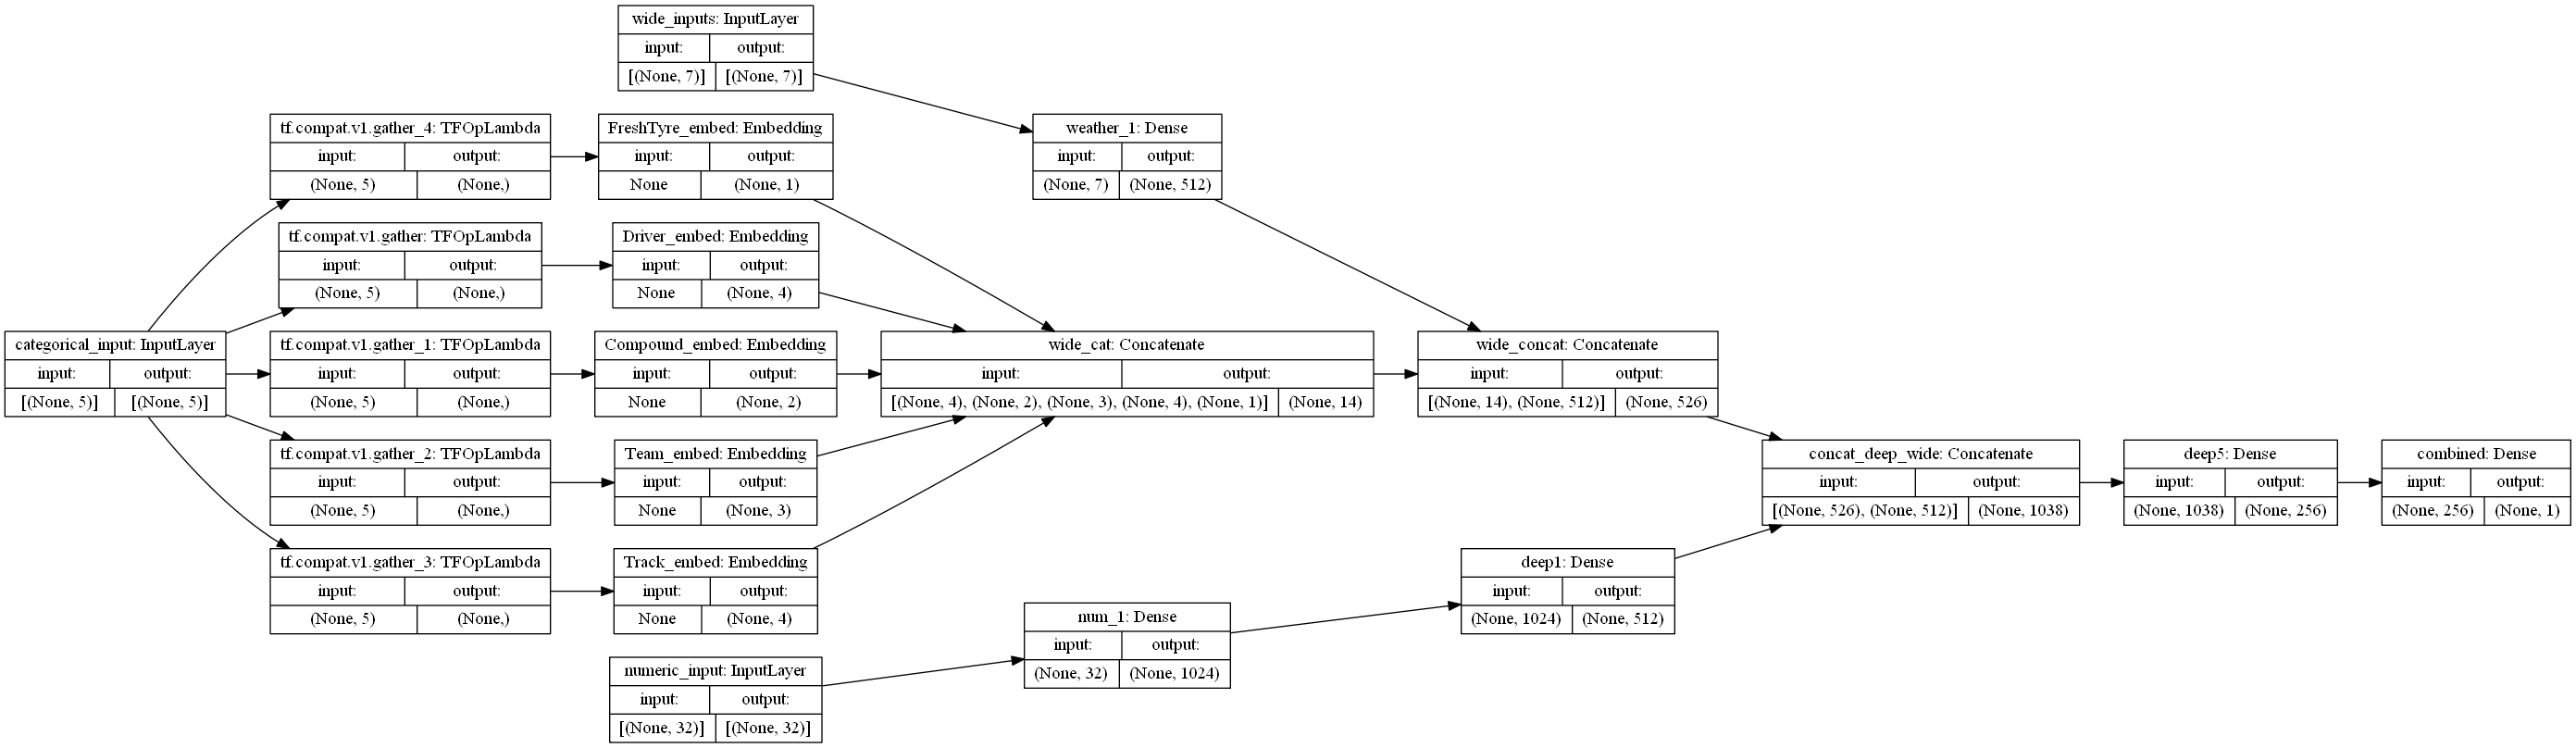

In [6]:
from tensorflow.keras.utils import plot_model

plot_model(
    create_model(race_data[categorical_features].to_numpy(dtype='int64'), race_data[numerical_features].to_numpy(),
                                 race_data[weather_features].to_numpy(), race_data), 
                 to_file='model.png', show_shapes=True, show_layer_names=True,
                 rankdir='LR', expand_nested=False, dpi=96
)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(race_data.loc[:, race_data.columns != 'NextSectorTime'].to_numpy(),
                                                    race_data['NextSectorTime'].to_numpy(), test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

EPOCHS = 100

model = create_model(race_data[categorical_features].to_numpy(dtype='int64'), race_data[numerical_features].to_numpy(),
                                 race_data[weather_features].to_numpy(), race_data)
history = model.fit([X_train[:, [race_data.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                     X_train[:, [race_data.columns.get_loc(col) for col in numerical_features]],
                     X_train[:, [race_data.columns.get_loc(col) for col in weather_features]]],
                     y_train, epochs=EPOCHS, batch_size=256, validation_split=0.1,
                     callbacks=[EarlyStopping(monitor='loss', patience=5, verbose=True)])

Epoch 1/100
144/144 [==============================] - 3s 6ms/step - loss: 49.2571 - mse: 49.2571 - val_loss: 3.9183 - val_mse: 3.9183
Epoch 2/100
144/144 [==============================] - 1s 5ms/step - loss: 3.0101 - mse: 3.0101 - val_loss: 2.4026 - val_mse: 2.4026
Epoch 3/100
144/144 [==============================] - 1s 5ms/step - loss: 2.0126 - mse: 2.0126 - val_loss: 1.8095 - val_mse: 1.8095
Epoch 4/100
144/144 [==============================] - 1s 5ms/step - loss: 1.4842 - mse: 1.4842 - val_loss: 1.3240 - val_mse: 1.3240
Epoch 5/100
144/144 [==============================] - 1s 5ms/step - loss: 1.1164 - mse: 1.1164 - val_loss: 1.0366 - val_mse: 1.0366
Epoch 6/100
144/144 [==============================] - 1s 5ms/step - loss: 0.8809 - mse: 0.8809 - val_loss: 0.8425 - val_mse: 0.8425
Epoch 7/100
144/144 [==============================] - 1s 5ms/step - loss: 0.7164 - mse: 0.7164 - val_loss: 0.7370 - val_mse: 0.7370
Epoch 8/100
144/144 [==============================] - 1s 5ms/step 

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred = model.predict([X_test[:, [race_data.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                      X_test[:, [race_data.columns.get_loc(col) for col in numerical_features]],
                      X_test[:, [race_data.columns.get_loc(col) for col in weather_features]]])
print('MSE:\t', mean_squared_error(y_test, pred))
print('MAE:\t', mean_absolute_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

MSE:	 0.39710804426853297
MAE:	 0.4687044521112862
Predicted:  26.161 	Actual:  25.964
Predicted:  35.66 	Actual:  35.418
Predicted:  31.616 	Actual:  31.267
Predicted:  40.082 	Actual:  39.035
Predicted:  39.031 	Actual:  38.687
Predicted:  24.995 	Actual:  25.003
Predicted:  34.111 	Actual:  33.247
Predicted:  31.846 	Actual:  31.498
Predicted:  20.975 	Actual:  21.092
Predicted:  35.946 	Actual:  34.864
Predicted:  24.562 	Actual:  24.602
Predicted:  32.571 	Actual:  32.259
Predicted:  30.676 	Actual:  30.008
Predicted:  31.07 	Actual:  30.949
Predicted:  32.519 	Actual:  31.632
Predicted:  30.468 	Actual:  30.054
Predicted:  32.682 	Actual:  31.592
Predicted:  33.385 	Actual:  32.737
Predicted:  26.006 	Actual:  25.966
Predicted:  29.845 	Actual:  29.555
Predicted:  34.983 	Actual:  34.222
Predicted:  36.074 	Actual:  35.651
Predicted:  40.42 	Actual:  37.597
Predicted:  45.673 	Actual:  43.969
Predicted:  36.06 	Actual:  35.492
Predicted:  30.337 	Actual:  29.485
Predicted:  43.38

In [10]:
from matplotlib import pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

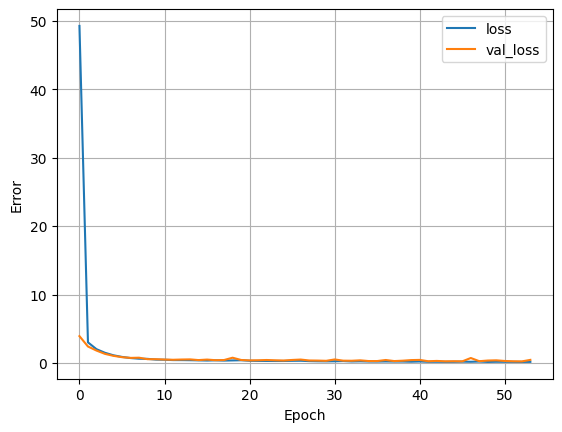

In [11]:
plot_loss(history)

## Learning Rate Warmup with Cosine Decay

Code from [here](https://stackabuse.com/learning-rate-warmup-with-cosine-decay-in-keras-and-tensorflow/).

In [12]:
def lr_warmup_cosine_decay(global_step,
                           warmup_steps,
                           hold = 0,
                           total_steps=0,
                           start_lr=0.0,
                           target_lr=1e-3):
    # Cosine decay
    learning_rate = 0.5 * target_lr * (1 + np.cos(np.pi * (global_step - warmup_steps - hold) / float(total_steps - warmup_steps - hold)))

    # Target LR * progress of warmup (=1 at the final warmup step)
    warmup_lr = target_lr * (global_step / warmup_steps)

    # Choose between `warmup_lr`, `target_lr` and `learning_rate` based on whether `global_step < warmup_steps` and we're still holding.
    # i.e. warm up if we're still warming up and use cosine decayed lr otherwise
    if hold > 0:
        learning_rate = np.where(global_step > warmup_steps + hold,
                                 learning_rate, target_lr)
    
    learning_rate = np.where(global_step < warmup_steps, warmup_lr, learning_rate)
    return learning_rate

In [13]:
from keras import backend as K
from keras.callbacks import Callback

class WarmupCosineDecay(Callback):
    def __init__(self, total_steps=0, warmup_steps=0, start_lr=0.0, target_lr=1e-3, hold=0):

        super(WarmupCosineDecay, self).__init__()
        self.start_lr = start_lr
        self.hold = hold
        self.total_steps = total_steps
        self.global_step = 0
        self.target_lr = target_lr
        self.warmup_steps = warmup_steps
        self.lrs = []

    def on_batch_end(self, batch, logs=None):
        self.global_step = self.global_step + 1
        lr = model.optimizer.lr.numpy()
        self.lrs.append(lr)

    def on_batch_begin(self, batch, logs=None):
        lr = lr_warmup_cosine_decay(global_step=self.global_step,
                                    total_steps=self.total_steps,
                                    warmup_steps=self.warmup_steps,
                                    start_lr=self.start_lr,
                                    target_lr=self.target_lr,
                                    hold=self.hold)
        K.set_value(self.model.optimizer.lr, lr)

In [14]:
EPOCHS = 500
total_steps = len(X_train)*EPOCHS
warmup_steps = int(0.05*total_steps)

history = model.fit([X_train[:, [race_data.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                     X_train[:, [race_data.columns.get_loc(col) for col in numerical_features]],
                     X_train[:, [race_data.columns.get_loc(col) for col in weather_features]]],
                     y_train, epochs=EPOCHS, batch_size=256, validation_split=0.1,
                     callbacks=[EarlyStopping(monitor='loss', patience=5, verbose=True),
                                WarmupCosineDecay(total_steps=total_steps, 
                                                  warmup_steps=warmup_steps,
                                                  hold=int(warmup_steps/2), 
                                                  start_lr=0.0, 
                                                  target_lr=1e-3)])

Epoch 1/500
144/144 [==============================] - 1s 6ms/step - loss: 0.3189 - mse: 0.3189 - val_loss: 0.3801 - val_mse: 0.3801
Epoch 2/500
144/144 [==============================] - 1s 5ms/step - loss: 0.2262 - mse: 0.2262 - val_loss: 0.2830 - val_mse: 0.2830
Epoch 3/500
144/144 [==============================] - 1s 5ms/step - loss: 0.1499 - mse: 0.1499 - val_loss: 0.2318 - val_mse: 0.2318
Epoch 4/500
144/144 [==============================] - 1s 5ms/step - loss: 0.1195 - mse: 0.1195 - val_loss: 0.2169 - val_mse: 0.2169
Epoch 5/500
144/144 [==============================] - 1s 5ms/step - loss: 0.1109 - mse: 0.1109 - val_loss: 0.2118 - val_mse: 0.2118
Epoch 6/500
144/144 [==============================] - 1s 5ms/step - loss: 0.1066 - mse: 0.1066 - val_loss: 0.2079 - val_mse: 0.2079
Epoch 7/500
144/144 [==============================] - 1s 5ms/step - loss: 0.1032 - mse: 0.1032 - val_loss: 0.2045 - val_mse: 0.2045
Epoch 8/500
144/144 [==============================] - 1s 5ms/step - 

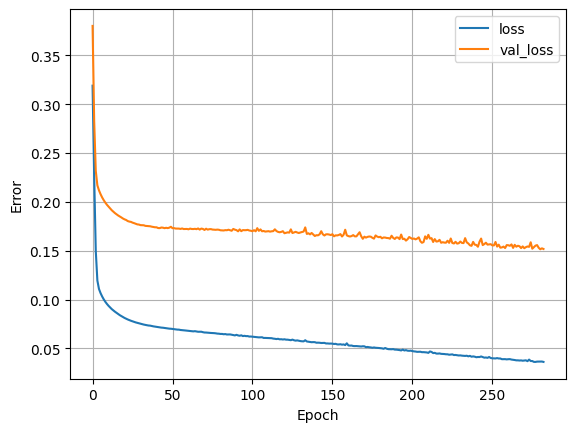

In [15]:
plot_loss(history)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred = model.predict([X_test[:, [race_data.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                      X_test[:, [race_data.columns.get_loc(col) for col in numerical_features]],
                      X_test[:, [race_data.columns.get_loc(col) for col in weather_features]]])
print('MSE:\t', mean_squared_error(y_test, pred))
print('MAE:\t', mean_absolute_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

MSE:	 0.13502409381813477
MAE:	 0.17970995330960496
Predicted:  25.998 	Actual:  25.964
Predicted:  35.219 	Actual:  35.418
Predicted:  31.393 	Actual:  31.267
Predicted:  39.401 	Actual:  39.035
Predicted:  38.765 	Actual:  38.687
Predicted:  24.581 	Actual:  25.003
Predicted:  33.159 	Actual:  33.247
Predicted:  31.096 	Actual:  31.498
Predicted:  21.139 	Actual:  21.092
Predicted:  35.632 	Actual:  34.864
Predicted:  24.938 	Actual:  24.602
Predicted:  32.311 	Actual:  32.259
Predicted:  30.178 	Actual:  30.008
Predicted:  31.003 	Actual:  30.949
Predicted:  31.636 	Actual:  31.632
Predicted:  29.982 	Actual:  30.054
Predicted:  31.858 	Actual:  31.592
Predicted:  32.901 	Actual:  32.737
Predicted:  25.782 	Actual:  25.966
Predicted:  29.589 	Actual:  29.555
Predicted:  34.093 	Actual:  34.222
Predicted:  35.621 	Actual:  35.651
Predicted:  37.733 	Actual:  37.597
Predicted:  44.861 	Actual:  43.969
Predicted:  35.477 	Actual:  35.492
Predicted:  29.482 	Actual:  29.485
Predicted:  

In [17]:
EPOCHS = 500
total_steps = len(X_train)*EPOCHS
warmup_steps = int(0.05*total_steps)

model = create_model(race_data[categorical_features].to_numpy(dtype='int64'), race_data[numerical_features].to_numpy(),
                                 race_data[weather_features].to_numpy(), race_data)
history = model.fit([X_train[:, [race_data.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                     X_train[:, [race_data.columns.get_loc(col) for col in numerical_features]],
                     X_train[:, [race_data.columns.get_loc(col) for col in weather_features]]],
                     y_train, epochs=EPOCHS, batch_size=256, validation_split=0.1,
                     callbacks=[EarlyStopping(monitor='loss', patience=5, verbose=True),
                                WarmupCosineDecay(total_steps=total_steps, 
                                                  warmup_steps=warmup_steps,
                                                  hold=int(warmup_steps/2), 
                                                  start_lr=0.0, 
                                                  target_lr=1e-3)])

Epoch 1/500
144/144 [==============================] - 1s 6ms/step - loss: 922.8891 - mse: 922.8891 - val_loss: 927.2849 - val_mse: 927.2849
Epoch 2/500
144/144 [==============================] - 1s 5ms/step - loss: 921.4382 - mse: 921.4382 - val_loss: 925.0916 - val_mse: 925.0916
Epoch 3/500
144/144 [==============================] - 1s 5ms/step - loss: 918.5320 - mse: 918.5320 - val_loss: 921.4442 - val_mse: 921.4442
Epoch 4/500
144/144 [==============================] - 1s 5ms/step - loss: 914.1720 - mse: 914.1720 - val_loss: 916.3289 - val_mse: 916.3289
Epoch 5/500
144/144 [==============================] - 1s 5ms/step - loss: 908.3055 - mse: 908.3055 - val_loss: 909.6478 - val_mse: 909.6478
Epoch 6/500
144/144 [==============================] - 1s 5ms/step - loss: 900.7786 - mse: 900.7786 - val_loss: 901.1628 - val_mse: 901.1628
Epoch 7/500
144/144 [==============================] - 1s 5ms/step - loss: 891.2580 - mse: 891.2580 - val_loss: 890.4394 - val_mse: 890.4394
Epoch 8/500
1

In [18]:
pred = model.predict([X_test[:, [race_data.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                      X_test[:, [race_data.columns.get_loc(col) for col in numerical_features]],
                      X_test[:, [race_data.columns.get_loc(col) for col in weather_features]]])
print('MSE:\t', mean_squared_error(y_test, pred))
print('MAE:\t', mean_absolute_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

MSE:	 0.2991533745468113
MAE:	 0.29882958334796833
Predicted:  25.71 	Actual:  25.964
Predicted:  35.167 	Actual:  35.418
Predicted:  31.167 	Actual:  31.267
Predicted:  39.052 	Actual:  39.035
Predicted:  38.689 	Actual:  38.687
Predicted:  24.87 	Actual:  25.003
Predicted:  32.736 	Actual:  33.247
Predicted:  31.239 	Actual:  31.498
Predicted:  21.071 	Actual:  21.092
Predicted:  34.835 	Actual:  34.864
Predicted:  24.435 	Actual:  24.602
Predicted:  31.766 	Actual:  32.259
Predicted:  29.964 	Actual:  30.008
Predicted:  30.952 	Actual:  30.949
Predicted:  31.676 	Actual:  31.632
Predicted:  30.008 	Actual:  30.054
Predicted:  31.626 	Actual:  31.592
Predicted:  33.013 	Actual:  32.737
Predicted:  25.835 	Actual:  25.966
Predicted:  29.464 	Actual:  29.555
Predicted:  34.022 	Actual:  34.222
Predicted:  35.398 	Actual:  35.651
Predicted:  37.649 	Actual:  37.597
Predicted:  44.881 	Actual:  43.969
Predicted:  35.44 	Actual:  35.492
Predicted:  29.433 	Actual:  29.485
Predicted:  42.8

In [19]:
EPOCHS = 100

model = create_model(race_data[categorical_features].to_numpy(dtype='int64'), race_data[numerical_features].to_numpy(),
                                 race_data[weather_features].to_numpy(), race_data)
history = model.fit([X_train[:, [race_data.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                     X_train[:, [race_data.columns.get_loc(col) for col in numerical_features]],
                     X_train[:, [race_data.columns.get_loc(col) for col in weather_features]]],
                     y_train, epochs=EPOCHS, batch_size=256, validation_split=0.1,
                     callbacks=[EarlyStopping(monitor='loss', patience=5, verbose=True)])

Epoch 1/100
144/144 [==============================] - 1s 6ms/step - loss: 47.4517 - mse: 47.4517 - val_loss: 3.9576 - val_mse: 3.9576
Epoch 2/100
144/144 [==============================] - 1s 5ms/step - loss: 3.0393 - mse: 3.0393 - val_loss: 2.4435 - val_mse: 2.4435
Epoch 3/100
144/144 [==============================] - 1s 5ms/step - loss: 1.9548 - mse: 1.9548 - val_loss: 1.6867 - val_mse: 1.6867
Epoch 4/100
144/144 [==============================] - 1s 5ms/step - loss: 1.3674 - mse: 1.3674 - val_loss: 1.3196 - val_mse: 1.3196
Epoch 5/100
144/144 [==============================] - 1s 5ms/step - loss: 1.0174 - mse: 1.0174 - val_loss: 0.9738 - val_mse: 0.9738
Epoch 6/100
144/144 [==============================] - 1s 5ms/step - loss: 0.8261 - mse: 0.8261 - val_loss: 0.8484 - val_mse: 0.8484
Epoch 7/100
144/144 [==============================] - 1s 5ms/step - loss: 0.6896 - mse: 0.6896 - val_loss: 0.6726 - val_mse: 0.6726
Epoch 8/100
144/144 [==============================] - 1s 5ms/step 

In [20]:
EPOCHS = 500
total_steps = len(X_train)*EPOCHS
warmup_steps = int(0.05*total_steps)

history = model.fit([X_train[:, [race_data.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                     X_train[:, [race_data.columns.get_loc(col) for col in numerical_features]],
                     X_train[:, [race_data.columns.get_loc(col) for col in weather_features]]],
                     y_train, epochs=EPOCHS, batch_size=256, validation_split=0.1,
                     callbacks=[EarlyStopping(monitor='loss', patience=5, verbose=True),
                                WarmupCosineDecay(total_steps=total_steps, 
                                                  warmup_steps=warmup_steps,
                                                  hold=int(warmup_steps/2), 
                                                  start_lr=0.0, 
                                                  target_lr=1e-3)])

Epoch 1/500
144/144 [==============================] - 1s 5ms/step - loss: 0.0857 - mse: 0.0857 - val_loss: 0.1637 - val_mse: 0.1637
Epoch 2/500
144/144 [==============================] - 1s 5ms/step - loss: 0.0751 - mse: 0.0751 - val_loss: 0.1531 - val_mse: 0.1531
Epoch 3/500
144/144 [==============================] - 1s 5ms/step - loss: 0.0661 - mse: 0.0661 - val_loss: 0.1472 - val_mse: 0.1472
Epoch 4/500
144/144 [==============================] - 1s 5ms/step - loss: 0.0612 - mse: 0.0612 - val_loss: 0.1435 - val_mse: 0.1435
Epoch 5/500
144/144 [==============================] - 1s 5ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.1402 - val_mse: 0.1402
Epoch 6/500
144/144 [==============================] - 1s 5ms/step - loss: 0.0546 - mse: 0.0546 - val_loss: 0.1372 - val_mse: 0.1372
Epoch 7/500
144/144 [==============================] - 1s 5ms/step - loss: 0.0522 - mse: 0.0522 - val_loss: 0.1347 - val_mse: 0.1347
Epoch 8/500
144/144 [==============================] - 1s 5ms/step - 

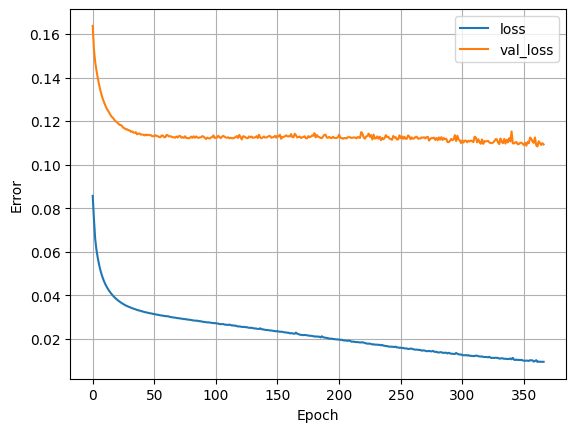

In [21]:
plot_loss(history)

In [22]:
pred = model.predict([X_test[:, [race_data.columns.get_loc(col) for col in categorical_features]].astype('int64'),
                      X_test[:, [race_data.columns.get_loc(col) for col in numerical_features]],
                      X_test[:, [race_data.columns.get_loc(col) for col in weather_features]]])
print('MSE:\t', mean_squared_error(y_test, pred))
print('MAE:\t', mean_absolute_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i, 0], 3), '\tActual: ', y_test[i])

MSE:	 0.11722749187730729
MAE:	 0.13789735084959548
Predicted:  26.112 	Actual:  25.964
Predicted:  35.456 	Actual:  35.418
Predicted:  31.292 	Actual:  31.267
Predicted:  39.367 	Actual:  39.035
Predicted:  38.528 	Actual:  38.687
Predicted:  24.791 	Actual:  25.003
Predicted:  33.086 	Actual:  33.247
Predicted:  31.38 	Actual:  31.498
Predicted:  21.046 	Actual:  21.092
Predicted:  35.816 	Actual:  34.864
Predicted:  24.659 	Actual:  24.602
Predicted:  32.177 	Actual:  32.259
Predicted:  30.004 	Actual:  30.008
Predicted:  30.92 	Actual:  30.949
Predicted:  31.545 	Actual:  31.632
Predicted:  30.001 	Actual:  30.054
Predicted:  31.727 	Actual:  31.592
Predicted:  32.89 	Actual:  32.737
Predicted:  25.888 	Actual:  25.966
Predicted:  29.664 	Actual:  29.555
Predicted:  34.428 	Actual:  34.222
Predicted:  35.805 	Actual:  35.651
Predicted:  37.692 	Actual:  37.597
Predicted:  44.584 	Actual:  43.969
Predicted:  35.592 	Actual:  35.492
Predicted:  29.433 	Actual:  29.485
Predicted:  42.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

regr = RandomForestRegressor(n_estimators=250, criterion='absolute_error', max_features='log2', bootstrap=False)
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
print('MSE:\t', mean_squared_error(y_test, pred))
print('MAE:\t', mean_absolute_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i], 3), '\tActual: ', y_test[i])

MSE:	 0.12441024258292092
MAE:	 0.12037123034591096
Predicted:  25.964 	Actual:  25.964
Predicted:  35.417 	Actual:  35.418
Predicted:  31.267 	Actual:  31.267
Predicted:  39.045 	Actual:  39.035
Predicted:  38.649 	Actual:  38.687
Predicted:  25.083 	Actual:  25.003
Predicted:  33.261 	Actual:  33.247
Predicted:  31.498 	Actual:  31.498
Predicted:  21.216 	Actual:  21.092
Predicted:  34.82 	Actual:  34.864
Predicted:  24.603 	Actual:  24.602
Predicted:  32.33 	Actual:  32.259
Predicted:  29.983 	Actual:  30.008
Predicted:  31.03 	Actual:  30.949
Predicted:  31.632 	Actual:  31.632
Predicted:  30.136 	Actual:  30.054
Predicted:  31.592 	Actual:  31.592
Predicted:  32.771 	Actual:  32.737
Predicted:  25.966 	Actual:  25.966
Predicted:  29.555 	Actual:  29.555
Predicted:  34.22 	Actual:  34.222
Predicted:  35.664 	Actual:  35.651
Predicted:  37.62 	Actual:  37.597
Predicted:  43.83 	Actual:  43.969
Predicted:  35.492 	Actual:  35.492
Predicted:  29.551 	Actual:  29.485
Predicted:  42.624

In [24]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=10000, eta=0.01, max_depth=8, subsample=0.5)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print('MSE:\t', mean_squared_error(y_test, pred))
print('MAE:\t', mean_absolute_error(y_test, pred))
for i in range(0, len(pred)):
    print('Predicted: ', round(pred[i], 3), '\tActual: ', y_test[i])

MSE:	 0.04224299139970961
MAE:	 0.048275218410312015
Predicted:  25.959 	Actual:  25.964
Predicted:  35.416 	Actual:  35.418
Predicted:  31.26 	Actual:  31.267
Predicted:  39.059 	Actual:  39.035
Predicted:  38.676 	Actual:  38.687
Predicted:  25.007 	Actual:  25.003
Predicted:  33.173 	Actual:  33.247
Predicted:  31.464 	Actual:  31.498
Predicted:  21.091 	Actual:  21.092
Predicted:  34.94 	Actual:  34.864
Predicted:  24.665 	Actual:  24.602
Predicted:  32.239 	Actual:  32.259
Predicted:  30.182 	Actual:  30.008
Predicted:  30.96 	Actual:  30.949
Predicted:  31.651 	Actual:  31.632
Predicted:  30.051 	Actual:  30.054
Predicted:  31.606 	Actual:  31.592
Predicted:  32.763 	Actual:  32.737
Predicted:  25.963 	Actual:  25.966
Predicted:  29.56 	Actual:  29.555
Predicted:  34.252 	Actual:  34.222
Predicted:  35.648 	Actual:  35.651
Predicted:  37.631 	Actual:  37.597
Predicted:  44.031 	Actual:  43.969
Predicted:  35.478 	Actual:  35.492
Predicted:  29.5 	Actual:  29.485
Predicted:  42.77